In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
%pylab inline
sns.set_style('darkgrid')

Populating the interactive namespace from numpy and matplotlib


In [71]:
from scipy.signal import medfilt

In [72]:
df = pd.read_csv(glob('*dirt=00000*.csv')[0])
fs = glob('*dirt=05000*.csv')
dfs = [pd.read_csv(f) for f in fs]
dfs = pd.concat(dfs, axis=1)

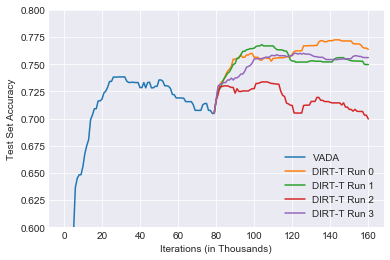

In [80]:
y = medfilt(df['Value'].values.T, 11)
n = len(y)
y_last = y[-1]
x = xrange(n)
plt.plot(x, y, label='VADA')

for i in xrange(4):
    y = medfilt(dfs['Value'].values.T[i], 11)
    x = xrange(n - 1, n + len(y))
    y = np.insert(y, 0, y_last)
    plt.plot(x, y, label='DIRT-T Run {}'.format(i))
    plt.ylim((.6, .8))
plt.legend()
plt.ylabel('Test Set Accuracy')
plt.xlabel('Iterations (in Thousands)')
plt.savefig('vada_dirtt.png', dpi=400)